In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#set path to data
path='/content/drive/MyDrive/Hackaton_GSG/new data'

In [4]:
#check files in folder
os.listdir(path)

['Constraint_English_Val.xlsx',
 'Constraint_English_Train.xlsx',
 'new_covid.csv']

In [6]:
#import data
data=pd.read_csv(path+'/new_covid.csv',encoding='cp1252')

In [7]:
#view data
data.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,0
1,2,11 out of 13 people (from the Diamond Princess...,0
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",0
3,4,Mike Pence in RNC speech praises Donald Trump’...,0
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,1


In [8]:
#shape
print("Data set shape: {}".format(data.shape))

Data set shape: (8560, 3)


Text(0, 0.5, 'Number of tweets')

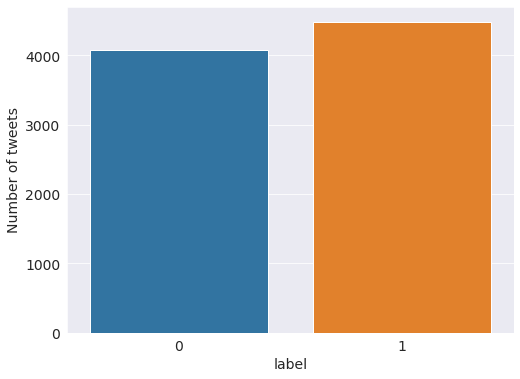

In [66]:
#distribution target
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=data.label)
plt.ylabel("Number of tweets")

In [14]:
#ratio of real to fake
num_real=data.label.sum()
num_fake=len(data)-num_real
print('Ratio of fake to real: {}'.format(num_real/num_fake))

Ratio of fake to real: 1.0980392156862746


In [15]:
#check null values
data.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [16]:
#install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
# tools for text processing
import re
import string
from nltk.corpus import stopwords

In [19]:
# Helper functions for processing text
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

#define stopword collection
stop_words = stopwords.words('english') + ["u", "im", "ur", "dont", "doin", "ure"]

#final text cleaning function
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [23]:
# apply processor to dataframe
data["clean_tweets"] = data["tweet"].apply(preprocess_data)

In [24]:
data.head()

,id,tweet,label,clean_tweets
0,1,Chinese converting to Islam after realising th...,0,chinese converting islam realising muslim affe...
1,2,11 out of 13 people (from the Diamond Princess...,0,people diamond princess cruise ship intially...
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",0,caused bacterium virus treated aspirin
3,4,Mike Pence in RNC speech praises Donald Trump’...,0,mike pence rnc speech praises donald trump’s ...
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,1,skys edconwaysky explains latest data govern...


Text(0.5, 0, 'Tweet Length')

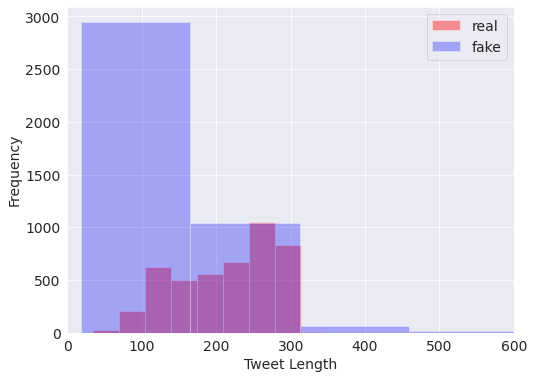

In [37]:
#Length of each tweet
data["length_tweet"] = data.tweet.apply(lambda x: len(x))
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(8, 6))
data.tweet.loc[data.label==1].apply(lambda x: len(x)).plot(bins=60, kind='hist', color='red', label='real', alpha=0.4)
data.tweet.loc[data.label==0].apply(lambda x: len(x)).plot(bins=60, kind='hist', color='blue', label='fake', alpha=0.3)
plt.xlim([0,600])
plt.legend()
plt.xlabel("Tweet Length")

Text(0.5, 0, 'Word Count')

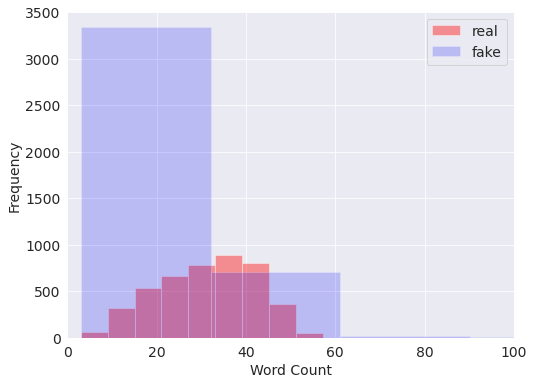

In [43]:
# number of words in each tweet
data["Tweet_Count"] = data.tweet.str.split().apply(lambda x: len(x))

plt.figure(figsize=(8, 6))
data.tweet.loc[data.label==1].str.split().apply(lambda x: len(x)).plot(bins=50, kind='hist', color='red', label='real', alpha=0.4)
data.tweet.loc[data.label==0].str.split().apply(lambda x: len(x)).plot(bins=50, kind='hist', color='blue', label='fake', alpha=0.2)
plt.xlim([0,100])
plt.legend()
plt.xlabel("Word Count")


Text(0.5, 0, 'Average Word Length')

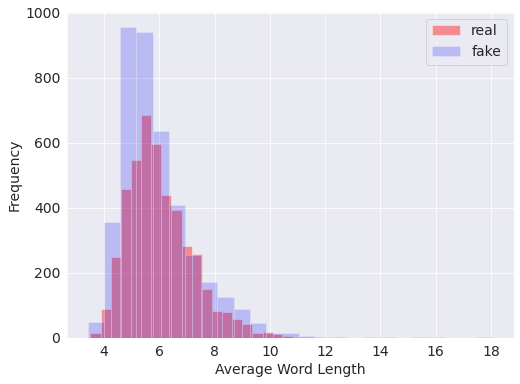

In [44]:
# average tweet length
data["Avg_Word"] = data.tweet.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

plt.figure(figsize=(8, 6))
data.tweet.loc[data.label==1].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).plot(bins=25, kind='hist', color='red', label='real', alpha=0.4)
data.tweet.loc[data.label==0].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).plot(bins=25, kind='hist', color='blue', label='fake', alpha=0.2)
plt.legend()
plt.xlabel("Average Word Length")

Text(0.5, 0, 'Unique Words')

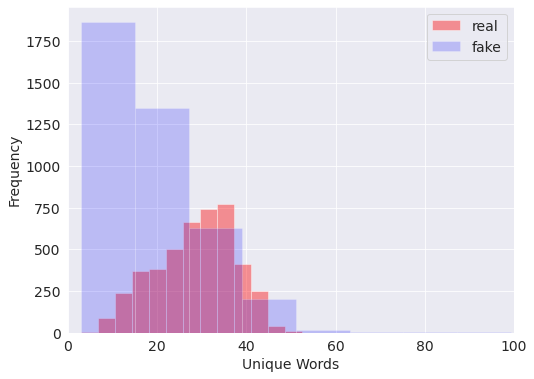

In [48]:
# unique words in each tweet
data["Unique_Words"] = data.tweet.str.split().apply(lambda x: len(set(str(x).split())))
plt.figure(figsize=(8, 6))
data.tweet.loc[data.label==1].str.split().apply(lambda x: len(set(str(x).split()))).plot(bins=60, kind='hist', color='red', label='real', alpha=0.4)
data.tweet.loc[data.label==0].str.split().apply(lambda x: len(set(str(x).split()))).plot(bins=60, kind='hist', color='blue', label='fake', alpha=0.2)
plt.xlim([0,100])
plt.legend()
plt.xlabel("Unique Words")

In [68]:
#function to process each tweet seperatly 
def create_corpus(target):
    corpus=[]
    for x in data[data['label']==target]['clean_tweets'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [69]:
# make a list of each word and how often it occurs for fake tweets
from collections import defaultdict

corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

Text(0.5, 1.0, 'Most common words in fake covid19 tweets')

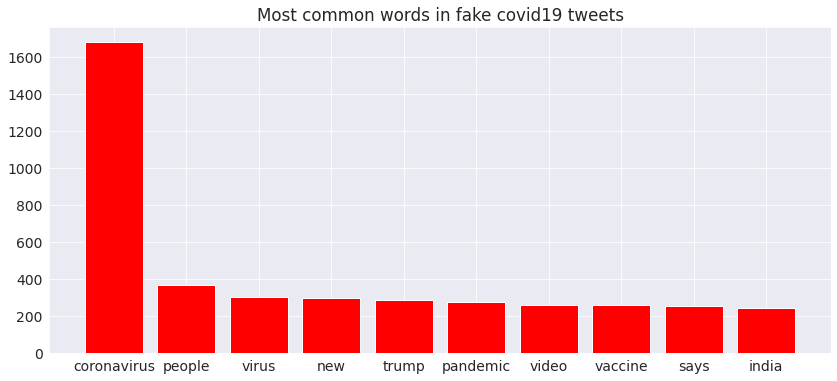

In [70]:
#plot
plt.figure(figsize=(14, 6))
x,y=zip(*top)
plt.bar(x,y, color="red")
plt.title(label="Most common words in fake covid19 tweets")

In [71]:
# make a list of each word and how often it occurs for real covid tweets
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

Text(0.5, 1.0, 'Most common words in real covid19 tweets')

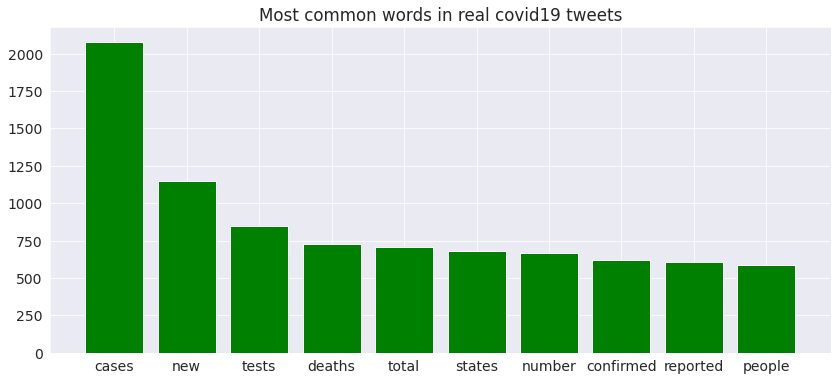

In [73]:
#plot
plt.figure(figsize=(14, 6))
x,y=zip(*top)
plt.bar(x,y, color="green", )
plt.title(label="Most common words in real covid19 tweets")